#### Now we are going to write a couple of functions that calculate the shortest paths

In [2]:
from rdflib import Graph, RDF, Namespace, Literal, URIRef
from SPARQLWrapper import SPARQLWrapper, JSON
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
def whoknowswho():
    sparql = SPARQLWrapper("http://localhost:5820/people/query")
    sparql.setQuery("""
    PREFIX IMDB: <http://data.linkedmdb.org/resource/> 
    PREFIX film: <http://data.linkedmdb.org/resource/film/> 
    PREFIX foaf: <http://xmlns.com/foaf/0.1/> 
    PREFIX movie: <http://data.linkedmdb.org/resource/movie/> 
    PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> 
    PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#> 
    PREFIX xml: <http://www.w3.org/XML/1998/namespace> 
    PREFIX xsd: <http://www.w3.org/2001/XMLSchema#> 

    SELECT ?name1 ?name2  WHERE {
            ?name1 IMDB:workedWith ?name2
            }

    """)
    sparql.setReturnFormat(JSON)
    results = sparql.query().convert()
    finalresults = []
    for knows in results["results"]["bindings"]:
        finalresults.append((knows["name1"]["value"],knows["name2"]["value"]))
    return list(set(finalresults))


In [4]:
def allpersons():
    sparql = SPARQLWrapper("http://localhost:5820/people/query")
    sparql.setQuery("""
    PREFIX IMDB: <http://data.linkedmdb.org/resource/> 
    PREFIX film: <http://data.linkedmdb.org/resource/film/> 
    PREFIX foaf: <http://xmlns.com/foaf/0.1/> 
    PREFIX movie: <http://data.linkedmdb.org/resource/movie/> 
    PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> 
    PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#> 
    PREFIX xml: <http://www.w3.org/XML/1998/namespace> 
    PREFIX xsd: <http://www.w3.org/2001/XMLSchema#> 
    PREFIX EX: <http://example.com/kad2017/>

    SELECT ?id ?ageGroup WHERE {
            ?id a IMDB:Person .
            ?id EX:hasAge ?ageGroup . 
            }

    """)
    sparql.setReturnFormat(JSON)
    results = sparql.query().convert()
    finalresults = {}
    for person in results["results"]["bindings"]:
        finalresults[person["id"]["value"]] = person['ageGroup']['value']
    return finalresults


In [5]:
def idtoname(idlist):
    sparql = SPARQLWrapper("http://localhost:5820/people/query")
    finalresults = []
    for personid in idlist:
        personid = personid[41::]
        print personid
        sparql.setQuery("""
        PREFIX IMDB: <http://data.linkedmdb.org/resource/> 
        PREFIX actor: <http://data.linkedmdb.org/resource/actor>
        PREFIX foaf: <http://xmlns.com/foaf/0.1/>
        
        SELECT ?name1 WHERE {{
            IMDB:{val} foaf:name ?name1 . 
        }}
        """.format(val=personid))
        sparql.setReturnFormat(JSON)
        results = sparql.query().convert()
        
        for person in results["results"]["bindings"]:
            finalresults.append(person["name1"]["value"])
        
    return finalresults

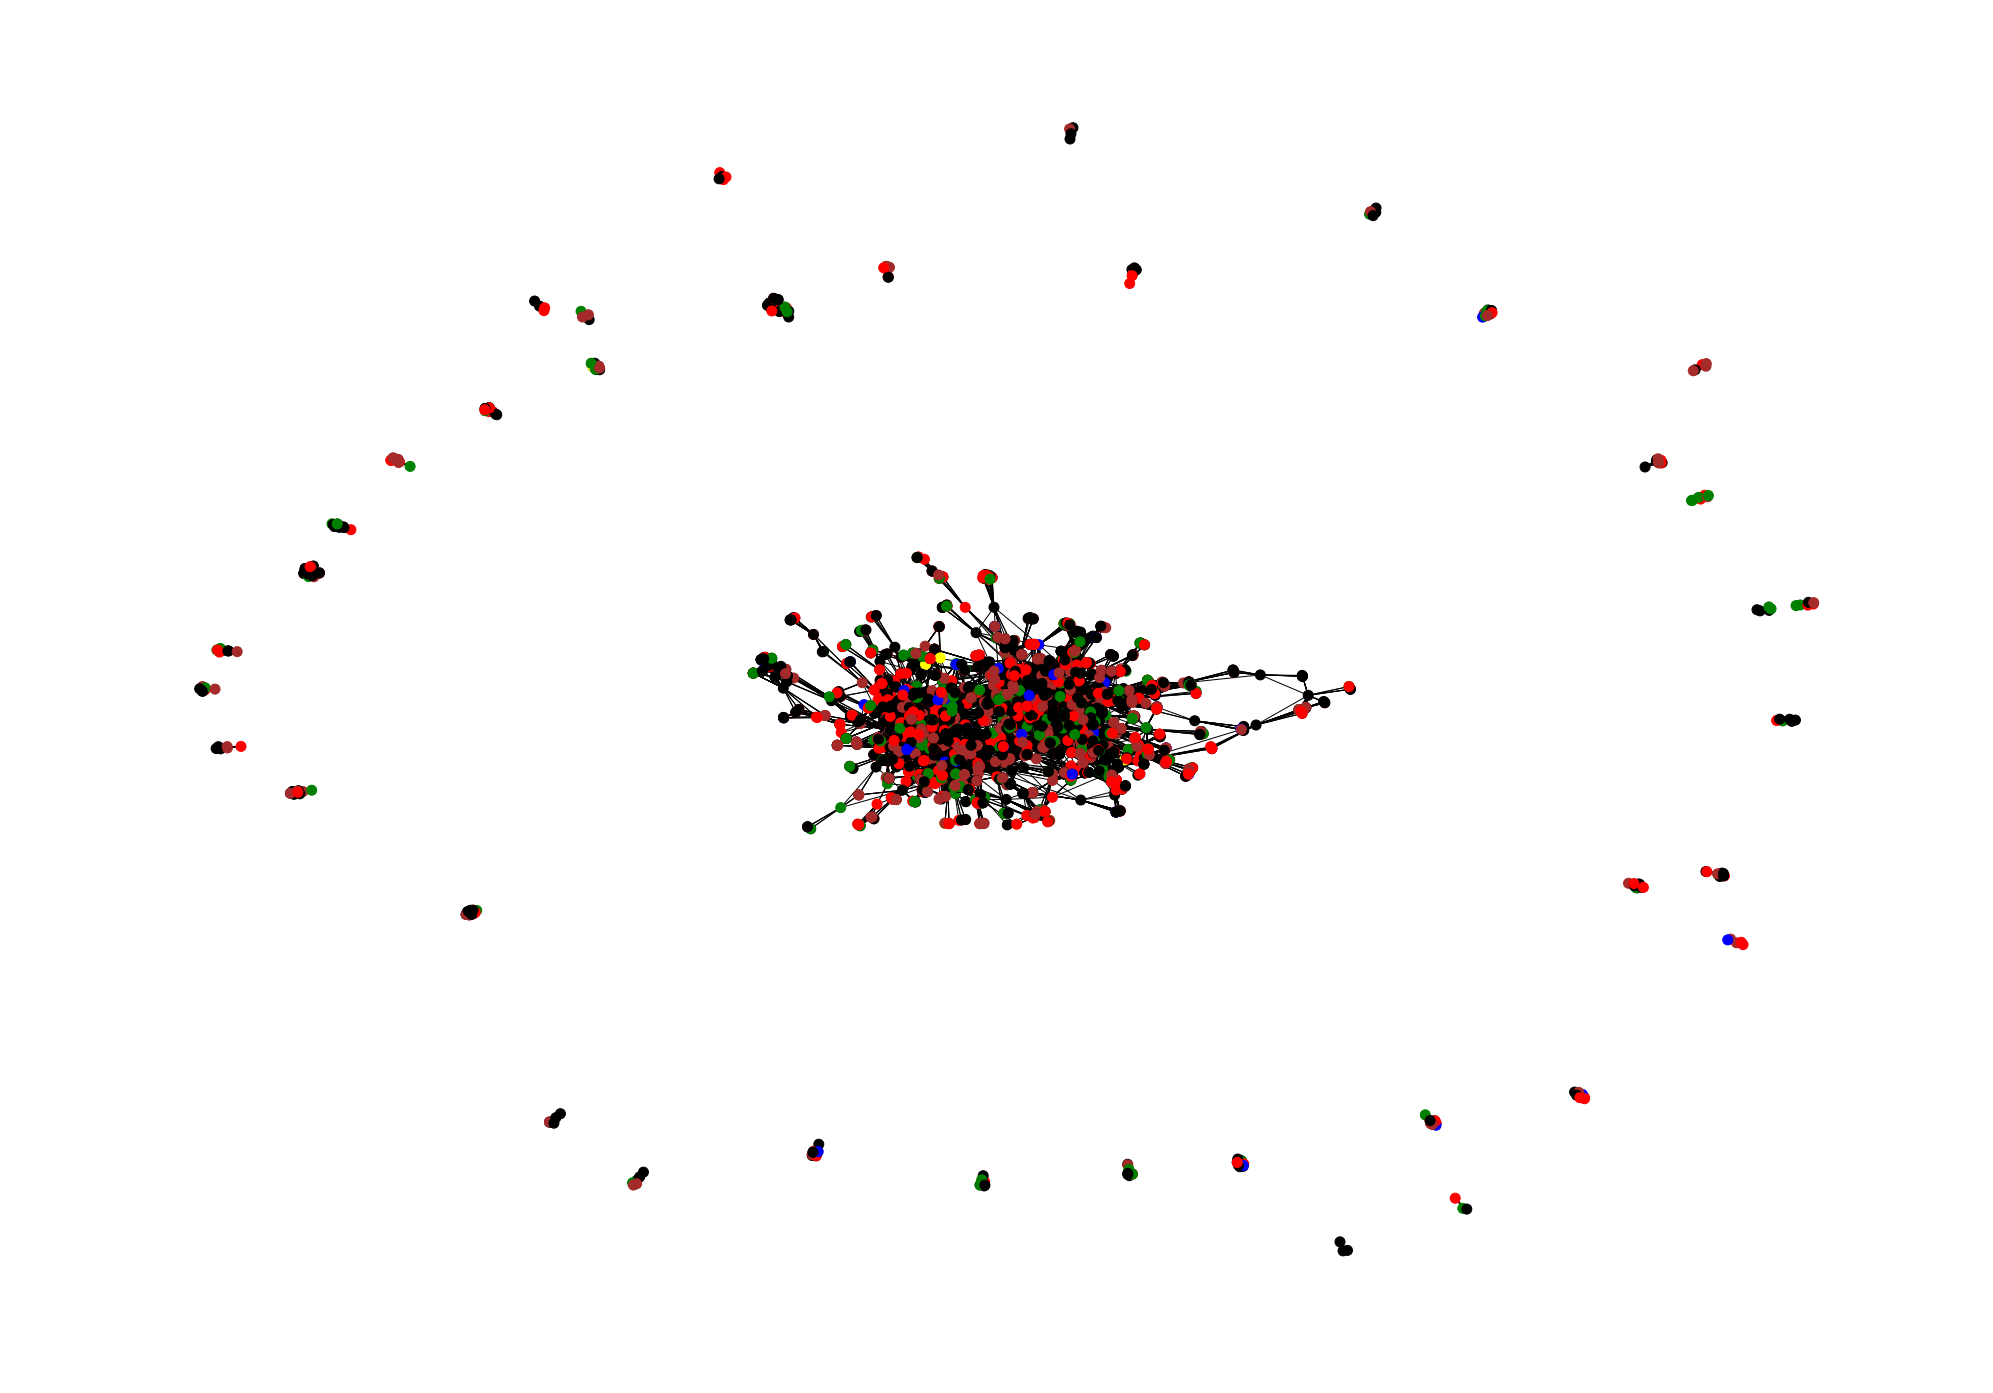

In [11]:
#Adding the data
G = nx.Graph()

#Colormap to give the nodes a color
color_map = []
#Adding the nodes with their corresponding color
for person, ageGroup in allpersons().iteritems():
    G.add_node(person)
    
    if ageGroup == 'http://example.com/kad2017/ageGroup-6':
        color_map.append('black')
    elif ageGroup == 'http://example.com/kad2017/ageGroup-5':
        color_map.append('brown')
    elif ageGroup == 'http://example.com/kad2017/ageGroup-4':
        color_map.append('red')
    elif ageGroup == 'http://example.com/kad2017/ageGroup-3':
        color_map.append('green')
    elif ageGroup == 'http://example.com/kad2017/ageGroup-2':
        color_map.append('blue')
    elif ageGroup == 'http://example.com/kad2017/ageGroup-1':
        color_map.append('yellow')
    else:
        color_map.append('pink')
        
G.add_edges_from(whoknowswho())

#get current size
fig_size = plt.rcParams["figure.figsize"]
#print fig_size

#Set the figure width to 35 and height to 25
fig_size[0] = 35
fig_size[1] = 25

#pos = nx.spring_layout(G)
#nx.draw_networkx_nodes(G,pos=pos, node_color='yellow', label='0-24 years old')
#nx.draw_networkx_nodes(G,pos=pos, node_color='blue', label='25-40 years old')
#nx.draw_networkx_nodes(G,pos=pos, node_color='green', label='41-55 years old')
#nx.draw_networkx_nodes(G,pos=pos, node_color='red', label='56-70 years old')
#nx.draw_networkx_nodes(G,pos=pos, node_color='brown', label='71-85 years old')
#nx.draw_networkx_nodes(G,pos=pos, node_color='black', label='85+ years old')
#nx.draw_networkx_nodes(G,pos=pos, node_color='pink', label='unknown')
#nx.draw_networkx_edges(G,pos=pos)

nx.draw_networkx(G, with_labels=False, node_color=color_map, node_size=100)

plt.legend(numpoints = 1)
plt.axis('off')
plt.savefig("labels_and_colors.png")
plt.show()